# Software Development und Python Basics

In diesem Notebook sammle ich ein paar Basics zum Entwickeln eines Projektes in Python.
Da ihr schon Kurse mit Python hattet, sollte das meiste nicht neu sein, eher sollen wichtige Parts wiederholt werden.
Wenn für euch noch wichtige Themen fehlen, kann ich diese hier noch hinzufügen. 

In [24]:
import datetime
import random
from pathlib import Path

import pandas as pd

## Organisierung eines Python Projekts

Eine kurze Übersicht, wie man seinen Code organisieren kann, von ersten Schritten und einfachen Programmen zu Komponenten die gut wiederverwendet werden können.

### Notebook

Als erste Methode, um schnell Sachen auszuprobieren und Ergebnisse sofort anzuzeigen, eignen sich Notebooks sehr gut.
Wenn immer wieder aufgeräumt wird und auch die anderen Features wie Markdown Überschriften und Text verwendet werden,
eignen sich diese auch sehr gut zum Anschaulich machen der einzelnen Schritte und um neues zu testen.
Da man aber oft an unterschiedlichen Stellen weiterarbeitet oder etwas neues probiert, können diese auch recht
schnell sehr unübersichtlich werden.

In [25]:
# Tipp um eigene Funktionen automatisch neu zu laden
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Skript

Wenn der Code, wie im Notebook definiert, in ein Python File kopiert wird, so dass dieser von oben nach unten
ausgeführt wird, hat man ein Skript. In den meisten Fällen werdet ihr die Hauptschritte eures Projektes
in einem Skript ausführen. Idealerweise werden die wichtigen Komponenten hier aber nur aufgerufen, 
und befinden sich schön gegliedert in anderen Files.

### Funktionen

Sobald die gewünschte Herangehensweise im Notebook ausgetestet wurde, macht es Sinn diese in 
einzelne Funktionen aufzuteilen. Diese haben jeweils eine klar beschrieben Aufgabe, definierte 
Input und Output Parameter und können somit auch wiederverwendet werden. 

Meine Empfehlung ist es, sich bevor man den Code in die Funktion gibt, zu überlegen welche Ein- und
Ausgangsparameter man erwartet. Am besten geht das, in dem man zuerst die Signatur der Funktion
inklusive Docstring schreibt, und dann die Funktionalität aus dem Notebook überträgt, oft mit
einigen Verallgemeinerungen.

In [26]:
# Example of a Function stub, to define functionality, in and output parameters before the implementation
def load_profile_for_day(  # Descriptive Name
    day: datetime.date,
    profile_df: pd.DataFrame,
    dynamize: bool = False,  # Parameters, with type hints to make explicit what we expect
) -> pd.Series:  # Return type
    # Docstring with one title line, optionally some more description, and a description of Arguments and what is returned
    """Get the 15 minute load profile for a single day.

    Args:
        day (datetime.date): Date for which to get the load profile.
        profile_df (pd.DataFrame): In the format as given by get_profile_from_file.
        dynamize (bool): Should dynamization by the 4th-grade polynomial dynamization
            function for day of year be applied. This should be only done for H0. Defaults to False.

    Returns:
        pd.Series: Series with Watt values every 15 minutes, and a pd.DatetimeIndex.
    """
    pass  # Implementation follows in second step.

Diese Herangehensweise habe ich für die Standardlastprofile gewählt. Im Notebook *11_load_profiles.ipynb*
habe ich die einzelnen Schritte ausprobiert, dann habe ich eine Funktion erstellt und diese 
schlussendlich in ein eigenes File *src/load_profiles.py* kopiert. Von dort können sie nun importiert werden.

In [27]:
from src.load_profiles import get_load_profile

In [28]:
lastprofile_file = (
    Path(".") / "data" / "representative_profiles_vdew.xls"
)
assert (
    lastprofile_file.is_file()
), f"Did not find file with representative load profiles at {lastprofile_file}"

In [29]:
h0profile = get_load_profile(
    lastprofile_file,
    from_=datetime.date(2015, 1, 1),
    to=datetime.date(2015, 12, 31),
    type="H0",
)

In [30]:
h0profile.head()

2015-01-01 00:15:00    108.677635
2015-01-01 00:30:00    100.728643
2015-01-01 00:45:00     93.152259
2015-01-01 01:00:00     85.824281
2015-01-01 01:15:00     78.744710
dtype: float64

### Classes

Objekt-orientiertes Programmieren baut sehr stark auf Klassen auf. Vor allem nützlich wenn Objekte
erstellt werden sollen, die auch ihren eigenen Zustand speichern sollen.
Klasse am besten in einem eigenen File erstellen, hier ein kurzes Beispiel als Wiederholung.

In [31]:
# Class Names by convention in CamelCase
# Inheriting from default class object
class Wuerfel(object):
    # properties can be defined statically here
    seiten = [1, 2, 3, 4, 5, 6]
    
    # __init__ method is called when the class is instantiated
    # Usually used to define properties dynamically
    # Every method has self as it's first argument, this is used to access all class properties and methods
    def __init__(self, init_seite_oben: int=None):
        if init_seite_oben is None:
            self.seite_oben = random.choice(self.seiten)
        else:
            self.seite_oben = init_seite_oben
    
    # methods, self and possibly more arguments, optional return
    def wurf(self):
        self.seite_oben = random.choice(self.seiten)

    def setzen(self, seite_oben: int):
        self.seite_oben = seite_oben
        
    def check_seite_oben(self) -> bool:
        if self.seite_oben in self.seiten:
            return True
        else:
            return False

In [32]:
# Instantiate 1 die
d1 = Wuerfel(1)
d1.seite_oben

1

In [33]:
d1.wurf()
d1.seite_oben

1

In [34]:
# Can create multiple instances of dice
d2 = Wuerfel()
d2.seite_oben

1

In [35]:
# d1 is independent
d1.seite_oben

1

In [36]:
print(d2.check_seite_oben())
d2.setzen(7)
print(d2.check_seite_oben())

True
False


In [37]:
# Inspect class instance
dir(d2)
# __name__ methods are thunder methods that are defined by object. They are used for various operations
# Sometimes you want to redefine them, so you get special behaviour.
# _name methods and properties are usually private, so not intended to be used
# all our defined properties and methods are in the end

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'check_seite_oben',
 'seite_oben',
 'seiten',
 'setzen',
 'wurf']

In [38]:
# Overwrite the str method, that defines what happens when the class is printed / converted to string
print(d2)

In [39]:
def wuerfel_str(self):
    return str(self.seite_oben)

# Adding methods outside of the class definition is not good practice
Wuerfel.__str__ = wuerfel_str

In [40]:
print(d2)

7


## Timeseries

Wir arbeiten mit Zeitserien, Diskretisierung in Intervalle, zB 15 Minuten Werte.

Python Tool: pandas DataFrame (oder Series) mit DateTimeIndex. 

### Daten importieren

Ich importiere hier die Daten die ich in Notebooks 10 und 11 erzeugt habe.
Wenn dieser Code nicht funktioniert, erst diese beiden Notebooks ausführen.

In [41]:
pv = pd.read_csv('outputs/pv_example.csv')
pv.head()

,time(UTC),0
0,2015-01-01 00:00:00,-0.1
1,2015-01-01 01:00:00,-0.1
2,2015-01-01 02:00:00,-0.1
3,2015-01-01 03:00:00,-0.1
4,2015-01-01 04:00:00,-0.1


In [42]:
# May also directly read in index
g0 = pd.read_csv('outputs/g0_2015.csv', index_col=0)
g0.head()

,0
2015-01-01 00:15:00,63.2
2015-01-01 00:30:00,61.0
2015-01-01 00:45:00,58.9
2015-01-01 01:00:00,57.0
2015-01-01 01:15:00,55.3


### DatetimeIndex und Zeitzonen

Ein großer Vorteil von Pandas ist, das komplexere Objekte den Index bilden können, so zum Beispiel Datetimes.
Diese können verwendet werden um relativ einfach unterschiedliche Zeiträume auszuwählen, Plots haben per Default 
eine Zeitachse, und auch der Wechsel zwischen unterschiedlichen Intervallen oder Zusammenfassungen sind relativ simpel möglich.
Dazu zuerst ein paar Beispiele mit den Lastdaten von g0.

Vor allem wenn Daten aus verschiedenen Quellen verwendet werden, ist es wichtig das die Zeiten zueinander stimmen.
Durch Zeitzonen, Sommerzeit und unterschiedliche Datumsformate können da aber recht leicht Fehler auftreten.
Auch dazu will ich ein paar Code Beispiele geben.

In [43]:
# Check if index is already DatetimeIndex
type(g0.index)

pandas.core.indexes.base.Index

In [44]:
# This does not work without a datetimeindex
g0.index.month
g0.loc['2015-05-01']

AttributeError: 'Index' object has no attribute 'month'

In [47]:
# This works in many cases, for non-standard formats see further below
g0.index = pd.to_datetime(g0.index)
type(g0.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [48]:
# Now this works
g0.index.month.unique()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32')

In [49]:
# And this
g0.loc['2015-01-01 07:00' : '2015-01-01 10:00']

,0
2015-01-01 07:00:00,51.4
2015-01-01 07:15:00,51.8
2015-01-01 07:30:00,51.7
2015-01-01 07:45:00,51.2
2015-01-01 08:00:00,50.5
2015-01-01 08:15:00,49.6
2015-01-01 08:30:00,49.0
2015-01-01 08:45:00,48.8
2015-01-01 09:00:00,49.5
2015-01-01 09:15:00,51.3


<Axes: >

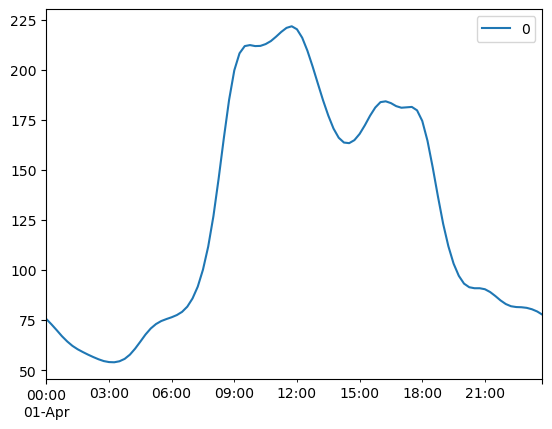

In [50]:
# And plotting with date axis
g0.loc['2015-04-01'].plot()
# TODO: Probably still an error in the data here, only one day with 'weekend' profile...

In [51]:
# As the pv data is hourly, let's resample our demand data to hours too
g0.sum() / 4. # This should give 1000 kWh -> g0 is in W

0    1102328.95
dtype: float64

In [52]:
# We resample by the mean as we have power units (would sum for energy)
g0_hourly = g0.resample('H').mean()

/tmp/ipykernel_75452/2506162210.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  g0_hourly = g0.resample('H').mean()


In [53]:
# And now calculate Energy consumption by month
# Check https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects for the offset strings
...

Ellipsis

In [54]:
# Check different datetime strings
print(pv.dtypes)
# This works again, and also is in UTC (nice!)
pd.to_datetime(pv['time(UTC)'])

time(UTC)     object
0            float64
dtype: object


0      2015-01-01 00:00:00
1      2015-01-01 01:00:00
2      2015-01-01 02:00:00
3      2015-01-01 03:00:00
4      2015-01-01 04:00:00
               ...        
8755   2015-12-31 19:00:00
8756   2015-12-31 20:00:00
8757   2015-12-31 21:00:00
8758   2015-12-31 22:00:00
8759   2015-12-31 23:00:00
Name: time(UTC), Length: 8760, dtype: datetime64[ns]

In [55]:
# But let's suppose a different format
pv['time2'] = pd.to_datetime(pv['time(UTC)']).dt.strftime('%d.%m.%y %H:%M')
pv['time2'].head()

0    01.01.15 00:00
1    01.01.15 01:00
2    01.01.15 02:00
3    01.01.15 03:00
4    01.01.15 04:00
Name: time2, dtype: object

In [56]:
# As the warning states, this may not always work. In this case it mixed up month and day.
pd.to_datetime(pv['time2'][23:26])

/tmp/ipykernel_75452/1765157529.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(pv['time2'][23:26])


23   2015-01-01 23:00:00
24   2015-02-01 00:00:00
25   2015-02-01 01:00:00
Name: time2, dtype: datetime64[ns]

In [57]:
# So better to explicitely specify the format
# Format according to the C standard formats: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
pd.to_datetime(pv['time2'][23:26], format='%d.%m.%y %H:%M')

23   2015-01-01 23:00:00
24   2015-01-02 00:00:00
25   2015-01-02 01:00:00
Name: time2, dtype: datetime64[ns]

In [58]:
# Even better to always use ISO 8601 format with time zone information
pv.index = pd.to_datetime(pv['time(UTC)'])
pv = pv.tz_localize('UTC')
pv.head()

,time(UTC),0,time2
time(UTC),,,
2015-01-01 00:00:00+00:00,2015-01-01 00:00:00,-0.1,01.01.15 00:00
2015-01-01 01:00:00+00:00,2015-01-01 01:00:00,-0.1,01.01.15 01:00
2015-01-01 02:00:00+00:00,2015-01-01 02:00:00,-0.1,01.01.15 02:00
2015-01-01 03:00:00+00:00,2015-01-01 03:00:00,-0.1,01.01.15 03:00
2015-01-01 04:00:00+00:00,2015-01-01 04:00:00,-0.1,01.01.15 04:00


In [59]:
# We also have to use load profiles with timezone now! Should be changed in functionality, as this is in local time
g0.tz_localize('Europe/Berlin')

NonExistentTimeError: 2015-03-29 02:00:00

In [60]:
g0 = g0.tz_localize('Europe/Berlin', ambiguous='NaT', nonexistent='shift_forward')
g0.head()

,0
2015-01-01 00:15:00+01:00,63.2
2015-01-01 00:30:00+01:00,61.0
2015-01-01 00:45:00+01:00,58.9
2015-01-01 01:00:00+01:00,57.0
2015-01-01 01:15:00+01:00,55.3


In [61]:
# Handling missing values. After this suboptimal transformation, we have missing values now
print(g0.index.isna().sum())
g0h = g0.resample('H').mean()
g0h.isna().sum()

4


/tmp/ipykernel_75452/3086817296.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  g0h = g0.resample('H').mean()


0    2
dtype: int64

In [92]:
g0h = g0h.ffill()  # Here we use Forward fill, may use bfill or value
# g0h = g0h.fillna(0)
g0h.isna().sum()

0    0
dtype: int64

In [101]:
# Make one DF with pv and g0 data
df = pd.DataFrame({'PV': pv['0'], 'G0': g0h.squeeze()})
df.head()

,PV,G0
2014-12-31 23:00:00+00:00,NaN,61.033333
2015-01-01 00:00:00+00:00,-0.1,54.525000
2015-01-01 01:00:00+00:00,-0.1,47.825000
2015-01-01 02:00:00+00:00,-0.1,42.900000
2015-01-01 03:00:00+00:00,-0.1,41.875000


### Grafische Libraries zum Arbeiten mit Pandas

* mito / mitosheet
* bamboolib
* pandasgui

Ich habe mitosheet getestet und glaube dass man damit ganz gut seinen Datenworkflow starten kann.
Eine Sache die nicht so gut unterstützt wird sind Indizes.

## Visualisierung

Möglichkeiten:

* matplotlib
* seaborn
* plotly

## Daten

* [APCS](https://www.apcs.at/de/clearing/technisches-clearing/lastprofile)
* [OPSD](https://open-power-system-data.org/)
* https://solar.htw-berlin.de/elektrische-lastprofile-fuer-wohngebaeude/
* https://www.renewables.ninja/
* https://joint-research-centre.ec.europa.eu/photovoltaic-geographical-information-system-pvgis_en
* https://simbench.de/de/datensaetze/

## Libraries

### Anbindung Wiener Netze Smart Meter Daten

Wiener Netze Smart Meter Portal https://smartmeter-web.wienernetze.at/#/welcome.

Git Repository fuer Abruf ueber API: https://github.com/platysma/vienna-smartmeter

## Best Practices

* Docstrings
* Type Hints
* Start with Notebook, move important pieces to .py file
* black autoformatter
* Exception Handling
* autoreload